### LAB 6

Filippo Cucchetto (matr.2110510)

### Exercise 1

a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. 
Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

Since the likelihood function is a Poisson distribution we have that the conjugate posterior is a gamma distribution.

In [1]:
y=c(0,1,2,3,4,5)
n1=c(109,65,22,3,1,0)
n2=c(144,91,32,11,2,0)
m=1000

UNIFORM PRIOR 
################## 
Posterior Mean first Dataset 0.615 
Posterior Variance first Dataset 0.003075 
################## 
Posterior Mean second Dataset 0.7035714 
Posterior Variance second Dataset 0.002512755 


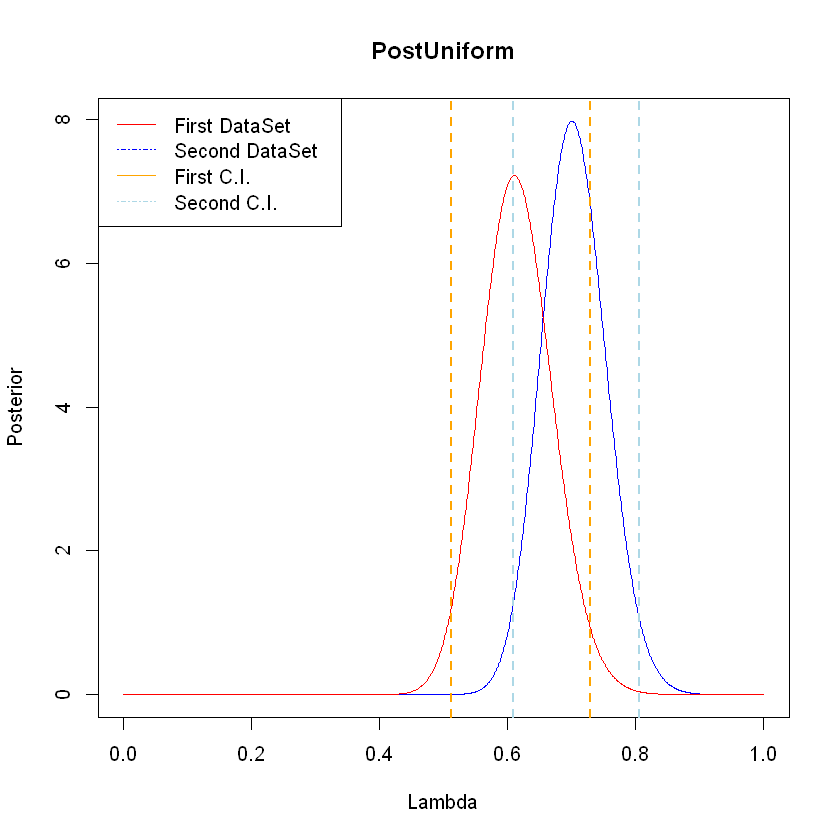

In [2]:
l=seq(0,1,length.out = m)
ComputePosterior=function(counts,tab,l,c){
    a=sum(counts*tab)
    b=sum(counts)
    if(c==1){
        alpha=a+1
        lam=b
    }
    else{
        alpha=a+0.5
        lam=b
    }
    post=dgamma(l,alpha,lam)
    post_mean=alpha/lam
    post_variance=alpha/(lam^2)
    CI = c(qgamma(2.5/100,alpha, lam) ,qgamma(97.5/100, alpha,lam))

    df=data.frame(posterior=post,mean=post_mean,variance=post_variance, credInt=CI)
    return(df)
}
cat("UNIFORM PRIOR","\n")
cat("##################","\n")
df1 = ComputePosterior(n1, y, l, 1)
df2 = ComputePosterior(n2, y, l, 1)

plot(l, df2$posterior, col='blue', type='l', xlab='Lambda', ylab='Posterior', main="PostUniform")
lines(l, df1$posterior, col='red', type='l', xlab='Lambda', ylab='Posterior')

abline(v=c(df1$credInt[1], df1$credInt[m]), lty=2, col="orange", lwd=2)
abline(v=c(df2$credInt[1], df2$credInt[m]), lty=2, col="lightblue", lwd=2)

legend("topleft", legend = c("First DataSet", "Second DataSet", "First C.I.", "Second C.I."), col=c("Red", "Blue", "orange", "lightblue"), lty=c(1, 4))

cat("Posterior Mean first Dataset", df1$mean[1], "\n")
cat("Posterior Variance first Dataset", df1$variance[1], "\n")
cat("##################", "\n")
cat("Posterior Mean second Dataset", df2$mean[1], "\n")
cat("Posterior Variance second Dataset", df2$variance[1], "\n")

JEFFREY'S PRIOR 
################## 
Posterior Mean first Dataset 0.6125 
Posterior Variance first Dataset 0.0030625 
################## 
Posterior Mean second Dataset 0.7017857 
Posterior Variance second Dataset 0.002506378 


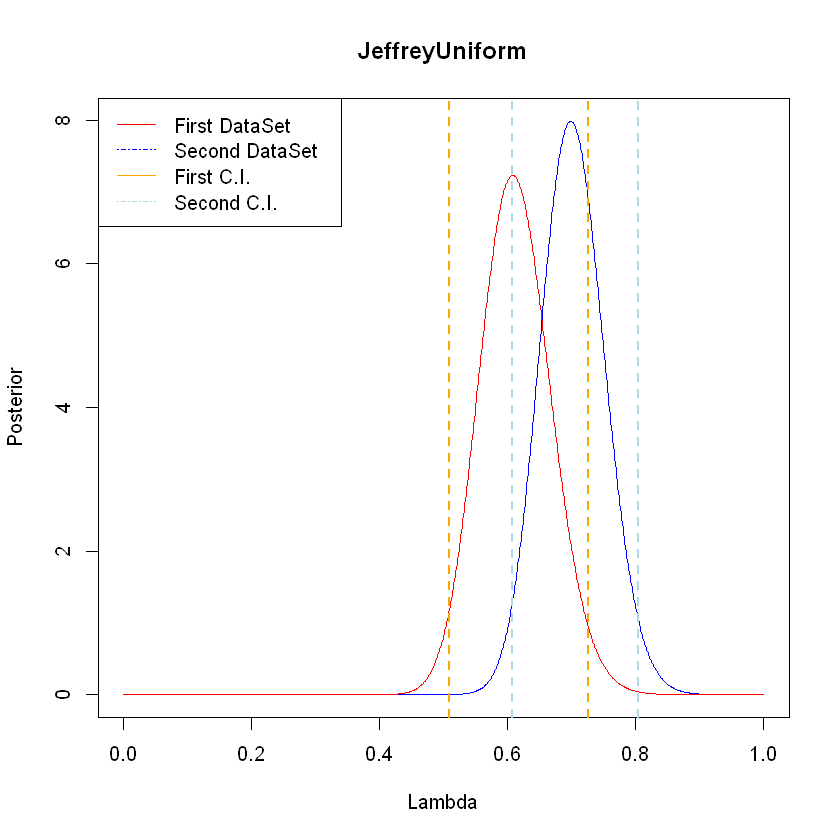

In [3]:
cat("JEFFREY'S PRIOR","\n")
cat("##################","\n")
df1 = ComputePosterior(n1, y, l, 2)
df2 = ComputePosterior(n2, y, l, 2)

plot(l, df2$posterior, col='blue', type='l', xlab='Lambda', ylab='Posterior', main="JeffreyUniform")
lines(l, df1$posterior, col='red', type='l', xlab='Lambda', ylab='Posterior')

abline(v=c(df1$credInt[1], df1$credInt[m]), lty=2, col="orange", lwd=2)
abline(v=c(df2$credInt[1], df2$credInt[m]), lty=2, col="lightblue", lwd=2)

legend("topleft", legend = c("First DataSet", "Second DataSet", "First C.I.", "Second C.I."), col=c("Red", "Blue", "orange", "lightblue"), lty=c(1, 4))

cat("Posterior Mean first Dataset", df1$mean[1], "\n")
cat("Posterior Variance first Dataset", df1$variance[1], "\n")
cat("##################", "\n")
cat("Posterior Mean second Dataset", df2$mean[1], "\n")
cat("Posterior Variance second Dataset", df2$variance[1], "\n")

### EXERCISE 2

In [4]:
library('rstan')

Loading required package: StanHeaders


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file



In [5]:
modelString_uniform = "
data {
  int<lower=0> N;
  int y[N];      
}
parameters {
  real<lower=0> lambda; 
}
model {
  lambda ~ beta(1,1);
  for (n in 1:N)
    y[n] ~ poisson(lambda);
}
"
stanDso_uniform=stan_model(model_code = modelString_uniform)

y1=rep(0:5,n1) 
N1=length(y1)
dataList1=list(N = N1, y = y1)

stanFit_uniform1=sampling(object = stanDso_uniform,data = dataList1,chains = 1,iter = 8000,warmup = 400,thin = 1)
posterior_samples_uniform1=extract(stanFit_uniform1)$lambda
y2=rep(0:5, n2)
N2=length(y2)
dataList2=list(N = N2,  y = y2)

stanFit_uniform2=sampling(object = stanDso_uniform,
                            data = dataList2,
                            chains = 1,
                            iter = 8000,
                            warmup = 400,
                            thin = 1)
posterior_samples_uniform2=extract(stanFit_uniform2)$lambda
post1=density(posterior_samples_uniform1)
post2=density(posterior_samples_uniform2)
credInt1=quantile(posterior_samples_uniform1, probs = c(0.025, 0.975))
credInt2=quantile(posterior_samples_uniform2, probs = c(0.025, 0.975))



SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000142 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.42 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  401 / 8000 [  5%]  (Sampling)
Chain 1: Iteration: 1200 / 8000 [ 15%]  (Sampling)
Chain 1: Iteration: 2000 / 8000 [ 25%]  (Sampling)
Chain 1: Iteration: 2800 / 8000 [ 35%]  (Sampling)
Chain 1: Iteration: 3600 / 8000 [ 45%]  (Sampling)
Chain 1: Iteration: 4400 / 8000 [ 55%]  (Sampling)
Chain 1: Iteration: 5200 / 8000 [ 65%]  (Sampling)
Chain 1: Iteration: 6000 / 8000 [ 75%]  (Sampling)
Chain 1: Iteration: 6800 / 8000 [ 85%]  (Sampling)
Chain 1: Iteration: 7600 / 8000 [ 95%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.142 seconds (Warm-up)
Chain 1:                1.327 seconds (Sampling)
Chain 1:         

#################### 
Posterior Mean first Dataset 0.616004 
Posterior Variance first Dataset 0.003037526 
################## 
Posterior Mean second Dataset 0.7048424 
Posterior Variance second Dataset 0.002445765 


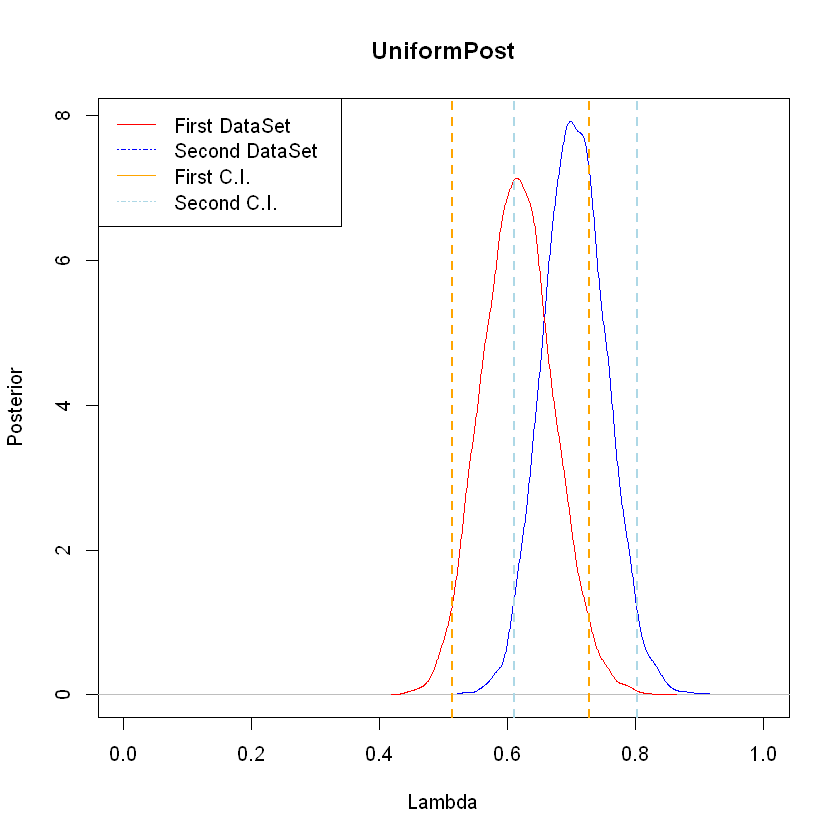

In [6]:
plot(post2,col='blue',type='l',xlab='Lambda',ylab='Posterior',main="UniformPost",xlim=c(0,1))

lines(post1,col='red', type='l', xlab='Lambda', ylab='Posterior')
abline(v=c(credInt1[1], credInt1[2]), lty=2, col="orange", lwd=2)
abline(v=c(credInt2[1], credInt2[2]), lty=2, col="lightblue", lwd=2)
legend("topleft", legend = c("First DataSet", "Second DataSet", "First C.I.", "Second C.I."), col=c("Red", "Blue", "orange", "lightblue"), lty=c(1, 4))
cat("####################","\n")
cat("Posterior Mean first Dataset",mean(posterior_samples_uniform1), "\n")
cat("Posterior Variance first Dataset",var(posterior_samples_uniform1), "\n")
cat("##################", "\n")
cat("Posterior Mean second Dataset",mean(posterior_samples_uniform2), "\n")
cat("Posterior Variance second Dataset",var(posterior_samples_uniform2), "\n")

In [7]:
modelString_uniform = "
data {
  int<lower=0> N;
  int y[N];      
}
parameters {
  real<lower=0> lambda; 
}
model {
  lambda ~ beta(0.5,0.5);
  for (n in 1:N)
    y[n] ~ poisson(lambda);
}
"
stanDso_uniform=stan_model(model_code = modelString_uniform)

y1=rep(0:5,n1) 
N1=length(y1)
dataList1=list(N = N1, y = y1)

stanFit_uniform1=sampling(object = stanDso_uniform,data = dataList1,chains = 1,iter = 8000,warmup = 400,thin = 1)
posterior_samples_uniform1=extract(stanFit_uniform1)$lambda
y2=rep(0:5, n2)
N2=length(y2)
dataList2=list(N = N2,  y = y2)

stanFit_uniform2=sampling(object = stanDso_uniform,
                            data = dataList2,
                            chains = 1,
                            iter = 8000,
                            warmup = 400,
                            thin = 1)
posterior_samples_uniform2=extract(stanFit_uniform2)$lambda
post1=density(posterior_samples_uniform1)
post2=density(posterior_samples_uniform2)
credInt1=quantile(posterior_samples_uniform1, probs = c(0.025, 0.975))
credInt2=quantile(posterior_samples_uniform2, probs = c(0.025, 0.975))




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000119 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.19 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  401 / 8000 [  5%]  (Sampling)
Chain 1: Iteration: 1200 / 8000 [ 15%]  (Sampling)
Chain 1: Iteration: 2000 / 8000 [ 25%]  (Sampling)
Chain 1: Iteration: 2800 / 8000 [ 35%]  (Sampling)
Chain 1: Iteration: 3600 / 8000 [ 45%]  (Sampling)
Chain 1: Iteration: 4400 / 8000 [ 55%]  (Sampling)
Chain 1: Iteration: 5200 / 8000 [ 65%]  (Sampling)
Chain 1: Iteration: 6000 / 8000 [ 75%]  (Sampling)
Chain 1: Iteration: 6800 / 8000 [ 85%]  (Sampling)
Chain 1: Iteration: 7600 / 8000 [ 95%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.153 seconds (Warm-up)
Chain 1:                1.721 seconds (Sampling)
Chain 1:         

Posterior Mean first Dataset 0.6169816 
Posterior Variance first Dataset 0.003041753 
################## 
Posterior Mean second Dataset 0.7057793 
Posterior Variance second Dataset 0.002575396 


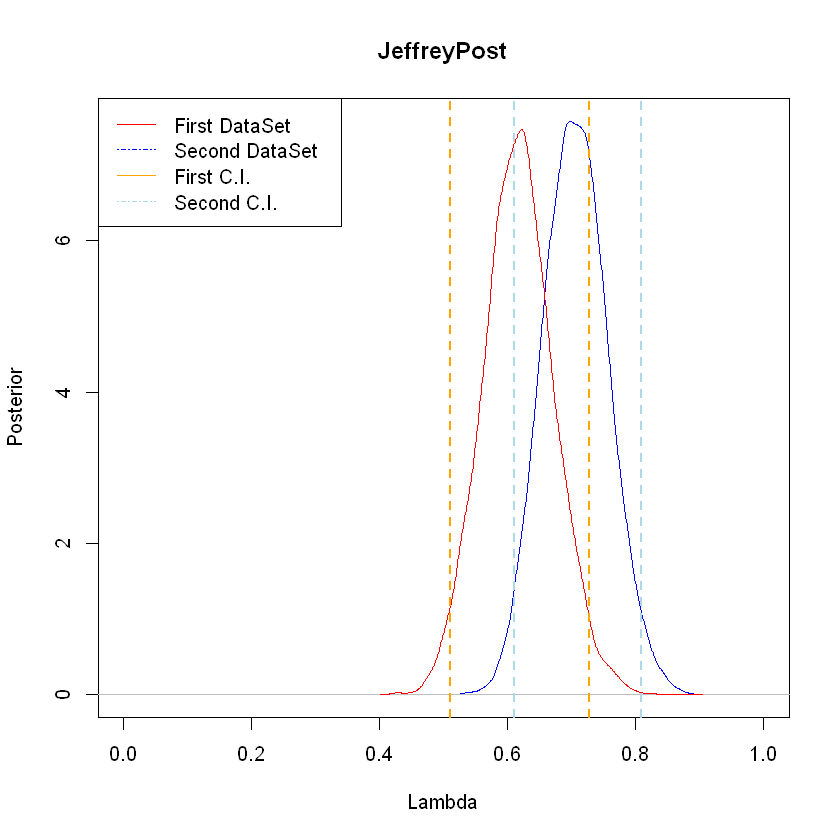

In [8]:
plot(post2,col='blue',type='l',xlab='Lambda',ylab='Posterior',xlim=c(0,1),main="JeffreyPost")
lines(post1,col='red', type='l', xlab='Lambda', ylab='Posterior')

abline(v=c(credInt1[1], credInt1[2]), lty=2, col="orange", lwd=2)
abline(v=c(credInt2[1], credInt2[2]), lty=2, col="lightblue", lwd=2)
legend("topleft", legend = c("First DataSet", "Second DataSet", "First C.I.", "Second C.I."), col=c("Red", "Blue", "orange", "lightblue"), lty=c(1, 4))


cat("Posterior Mean first Dataset",mean(posterior_samples_uniform1), "\n")
cat("Posterior Variance first Dataset",var(posterior_samples_uniform1), "\n")
cat("##################", "\n")
cat("Posterior Mean second Dataset",mean(posterior_samples_uniform2), "\n")
cat("Posterior Variance second Dataset",var(posterior_samples_uniform2), "\n")

### EXERCISE 3

In [9]:
n=116
y=11
m=100
alpha=1
beta=10

In [10]:
ComputePosterior3=function(y,n,alpha,beta,m){

    #Frequentistit esitmation
    p=y/n
    cat("Frequentis estimation of p:",p,"\n")
    AA=0.05
   
    #Conjugate Posterior, since the likelihood is a binomial
    a=alpha+y
    b=beta+n-y
    l=seq(0,1,length.out = m)
    post_distro=dbeta(l,a,b)/sum(dbeta(l,a,b))
    post_mean=a/(a+b)
    post_var=(a*b)/(((a+b)^2)*(a+b+1))
    CI = c(qbeta(2.5/100,a,b) ,qbeta(97.5/100, a,b))
    df=data.frame(Dat=l,posterior=post_distro,mean=post_mean,var=post_var,CredInt=CI)
    ###perform the Hypothesis test###
    
    return(df)
}
D=ComputePosterior3(y,n,alpha,beta,m)


Frequentis estimation of p: 0.09482759 


Mean 0.09448819 
Variance 0.0006684388 
For the Bayesian approach we can say that: 
 Since 0.1 is inside our Credibility Interval we can say that we have 95% probability that our water is contamineted with 10% bacteria 


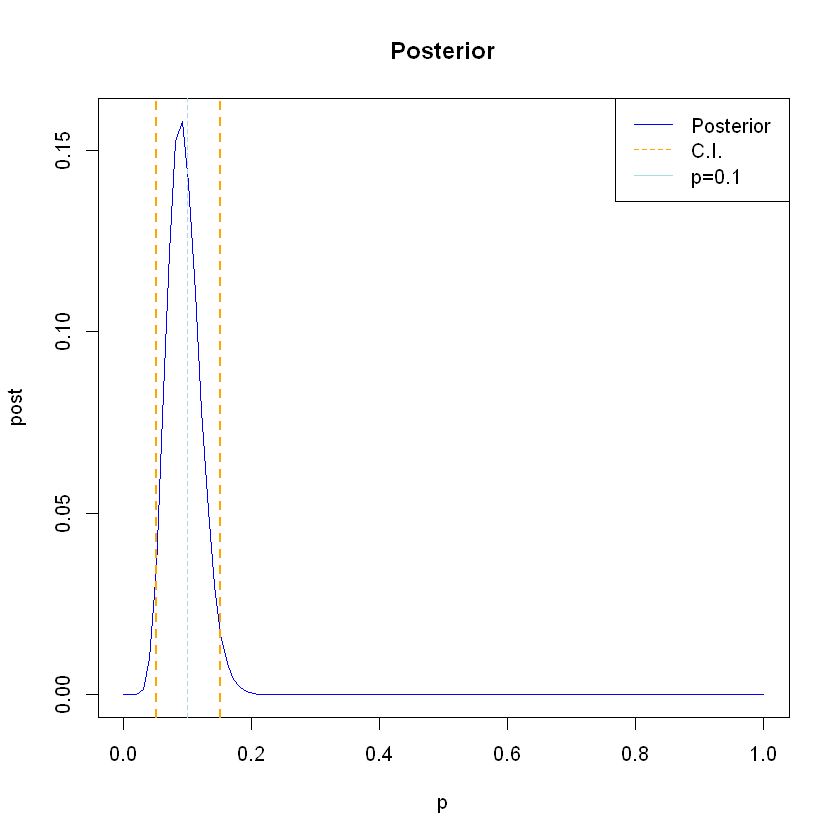

In [11]:
plot(D$Dat,D$posterior,col='blue',type='l',xlab='p',ylab='post',main='Posterior')
cat("Mean",D$mean[1],"\n")
cat("Variance",D$var[1],"\n")
abline(v=c(D$CredInt[1], D$CredInt[m]), lty=2, col="orange", lwd=2)
abline(v=0.1,col="lightblue",lty=2)
legend("topright", legend = c("Posterior", "C.I.","p=0.1"), col=c( "Blue", "orange","lightblue"), lty=c(1, 2))
cat("For the Bayesian approach we can say that:","\n", "Since 0.1 is inside our Credibility Interval we can say that we have 95% probability that our water is contamineted with 10% bacteria","\n")

Now for the Frequentist approach we just need to compute the probability of getting y=11 in n=116 with a p=0.1, if that values is greater that our alpha (5%) we can accept the Null Hypothesis

In [12]:
p  = .1
p0 = dbinom(y,n,p)
alpha = .05
if(p0>alpha){
    cat("Null Hypothesis accepted","\n")
    cat("Probability",p0)
}

Null Hypothesis accepted 
Probability 0.1232879

A new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter
X level 

In [13]:
p_f=9/165
cat("The frequentist estimation of p is:",p_f,"\n")

The frequentist estimation of p is: 0.05454545 


With a Beta 1,10 the bayesian estimation of p (posterior mean) is: 0.08766363 
The credibility interval is 0.04502168 0.1426408 
For the Bayesian approach we can say that: 
 Since 0.1 is inside our Credibility Interval we can say that we have 95% probability that our water is contamineted with 10% bacteria 


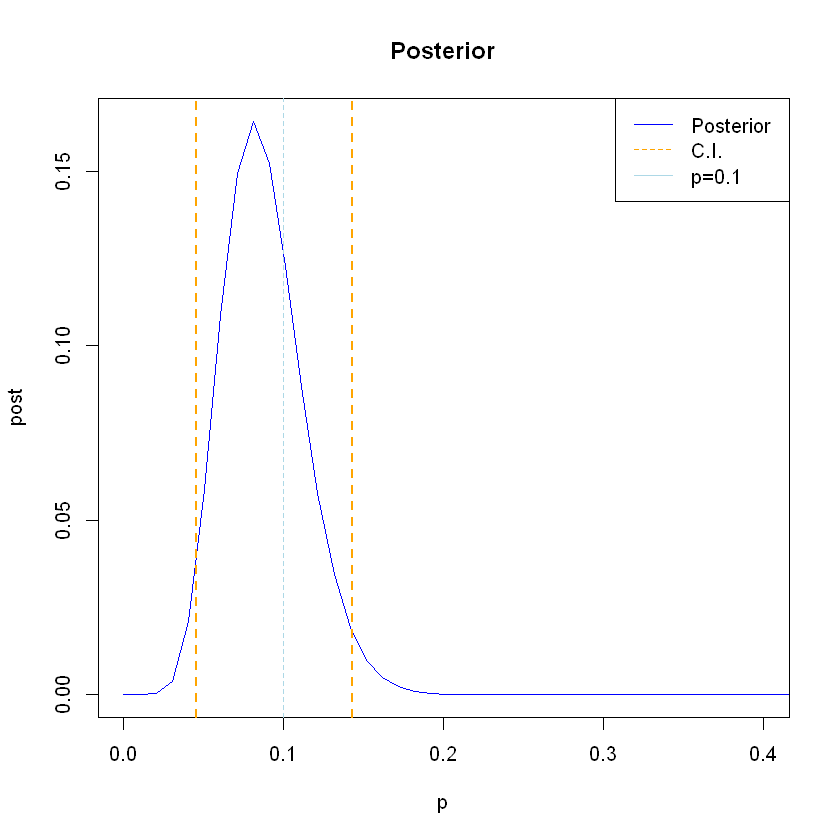

In [14]:
l=seq(0,1,length.out = m)
a=alpha+y
b=beta+n-y
post_distro=dbeta(l,a,b)/sum(dbeta(l,a,b))
post_mean=a/(a+b)
CI = c(qbeta(2.5/100,a,b) ,qbeta(97.5/100, a,b))

cat("With a Beta 1,10 the bayesian estimation of p (posterior mean) is:",post_mean,"\n")
cat("The credibility interval is",CI,"\n")

plot(l,post_distro,col='blue',type='l',xlab='p',ylab='post',main='Posterior',xlim=c(0,0.4))

abline(v=c(CI[1], CI[2]), lty=2, col="orange", lwd=2)
abline(v=0.1,col="lightblue",lty=2)
legend("topright", legend = c("Posterior", "C.I.","p=0.1"), col=c( "Blue", "orange","lightblue"), lty=c(1, 2))
cat("For the Bayesian approach we can say that:","\n", "Since 0.1 is inside our Credibility Interval we can say that we have 95% probability that our water is contamineted with 10% bacteria","\n")


Now using the conjugated posterior we just need to updated the parameters 

In [15]:
a_post=a+y
b_post=b+n-y
post_distro=dbeta(l,a_post,b_post)/sum(dbeta(l,a_post,b_post))
post_mean=a_post/(a_post+b_post)
CI = c(qbeta(2.5/100,a_post,b_post) ,qbeta(97.5/100, a_post,b_post))

cat("With the old Posterior as prior the bayesian estimation of p (posterior mean) is:",post_mean,"\n")
cat("The credibility interval is",CI,"\n")

With the old Posterior as prior the bayesian estimation of p (posterior mean) is: 0.09109688 
The credibility interval is 0.05825072 0.130329 


For the Bayesian approach we can say that: 
 Since 0.1 is inside our Credibility Interval we can say that we have 95% probability that our water is contamineted with 10% bacteria 


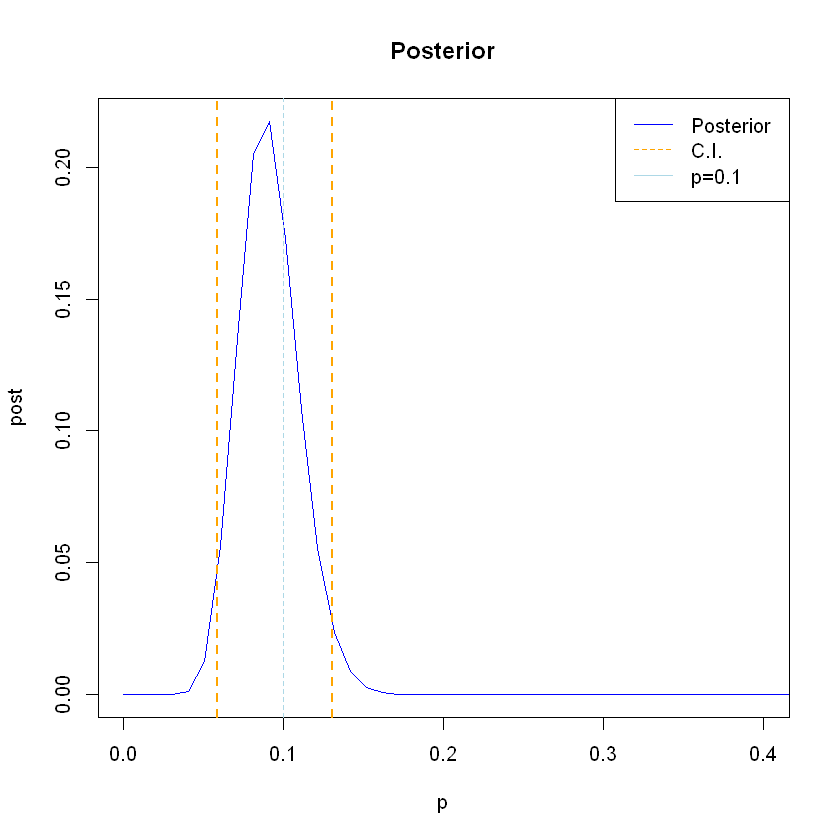

In [16]:
plot(l,post_distro,col='blue',type='l',xlab='p',ylab='post',main='Posterior',xlim=c(0,0.4))

abline(v=c(CI[1], CI[2]), lty=2, col="orange", lwd=2)
abline(v=0.1,col="lightblue",lty=2)
legend("topright", legend = c("Posterior", "C.I.","p=0.1"), col=c( "Blue", "orange","lightblue"), lty=c(1, 2))
cat("For the Bayesian approach we can say that:","\n", "Since 0.1 is inside our Credibility Interval we can say that we have 95% probability that our water is contamineted with 10% bacteria","\n")


In [17]:
cat("Frequentist test hypothesis:","\n")

p0 = dbinom(9,165,p_f)
alpha = .05
if(p0>alpha){
    cat("Null Hypothesis accepted","\n")
    cat("Probability",p0)
} else{
    cat("Null Hypothesis rejected","\n")
    cat("Probability",p0)
}

Frequentist test hypothesis: 
Null Hypothesis accepted 
Probability 0.135499

### EXERCISE 4

I create the model, the likelihood of the process is a binomial distribution

In [18]:
modelString_uniform = "
data {
  int<lower=0> N;
  int y;      
}
parameters {
  real<lower=0> theta; 
}
model {
  theta ~ beta(1,1);
  y ~ binomial(N,theta);
}
"



I create the MCMC and extract the values from the stan fit

In [19]:
stanDso_uniform=stan_model(model_code = modelString_uniform)

dataList1=list(N = 116, y = 11)

stanFit_uniform1=sampling(object = stanDso_uniform,data = dataList1,chains = 1,iter = 8000,warmup = 400,thin = 1)
posterior_samples_uniform1=extract(stanFit_uniform1)$theta

post1=density(posterior_samples_uniform1)
credInt1=quantile(posterior_samples_uniform1, probs = c(0.025, 0.975))


SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: Rejecting initial value:
Chain 1:   Error evaluating the log probability at the initial value.
Chain 1: Exception: beta_lpdf: Random variable is 1.07737, but must be in the interval [0, 1] (in 'string', line 9, column 2 to column 20)
Chain 1: 
Chain 1: Gradient evaluation took 2.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  401 / 8000 [  5%]  (Sampling)
Chain 1: Iteration: 1200 / 8000 [ 15%]  (Sampling)
Chain 1: Iteration: 2000 / 8000 [ 25%]  (Sampling)
Chain 1: Iteration: 2800 / 8000 [ 35%]  (Sampling)
Chain 1: Iteration: 3600 / 8000 [ 45%]  (Sampling)
Chain 1: Iteration: 4400 / 8000 [ 55%]  (Sampling)
Chain 1: Iteration: 5200 / 8000 [ 65%]  (Sampling)
Chain 1: Iteration: 6000 / 8000 [ 75%]  (Sampling)
Chain 1: Iteration: 6800 / 8000 [ 8

Warning message in mean.default(post1):
"argument is not numeric or logical: returning NA"


Posterior mean NA 
Credibility Interval 0.05420021 0.1644861 


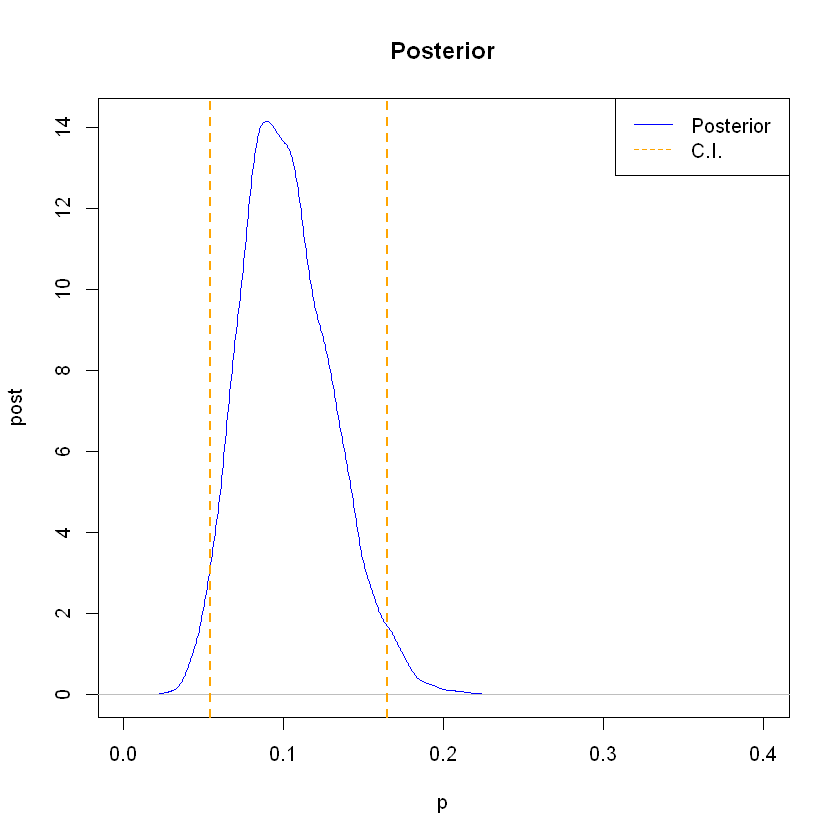

In [20]:
plot(post1,col='blue',type='l',xlab='p',ylab='post',main='Posterior',xlim=c(0,0.4))

abline(v=c(credInt1[1],credInt1[2]), lty=2, col="orange", lwd=2)
legend("topright", legend = c("Posterior", "C.I."), col=c( "Blue", "orange"), lty=c(1, 2))
cat("Posterior mean",mean(post1),"\n")
cat("Credibility Interval",credInt1,"\n")
